## JIRA DATASET - DATA MINING PROJECT

### 1. Data Understanding

In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(rpart) # for regression trees
library(randomForest) # for random forest
library(modelr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



In [2]:
readfile <- read.csv("./DATASET/GFG_FINAL.csv")

In [3]:
readfile

Summary,Issue.key,Issue.id,Issue.Type,Status,Project.key,Project.name,Project.type,Project.lead,Project.description,...,Comment.75,Comment.76,Comment.77,Comment.78,Comment.79,Comment.80,Comment.81,Comment.82,Comment.83,Comment.84
Authentication failed when attempting Fetch command,SRCTREEWIN-14001,1930475,Bug,Needs Triage,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NA,...,,,,,,,,,,
OAuth token keeps expiring,SRCTREEWIN-14000,1930057,Bug,Needs Triage,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NA,...,,,,,,,,,,
Mercurial: No column for revision/changeset number,SRCTREEWIN-13999,1930239,Suggestion,Gathering Interest,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NA,...,,,,,,,,,,
Add an option to disable `git lfs ls-files` on startup,SRCTREEWIN-13998,1930030,Suggestion,Gathering Interest,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NA,...,,,,,,,,,,
Unable to start SourceTree after updating from older version to 3.4.12,SRCTREEWIN-13997,1929802,Bug,Needs Triage,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NA,...,,,,,,,,,,
Keesp Asking for GitHub Login,SRCTREEWIN-13996,1929794,Bug,Needs Triage,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NA,...,,,,,,,,,,
Dark Theme - history changed files not displayed correctly,SRCTREEWIN-13995,1929745,Bug,Needs Triage,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NA,...,,,,,,,,,,
Unable to know if the time is AM or PM,SRCTREEWIN-13994,1929679,Bug,Needs Triage,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NA,...,,,,,,,,,,
"Fix for Git Buffer Overflow - CVE-2022-41903, CVE-2022-23521",SRCTREEWIN-13993,1929231,Bug,Closed,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NA,...,,,,,,,,,,
Ability to update (pull) all repos,SRCTREEWIN-13991,1918678,Suggestion,Gathering Interest,SRCTREEWIN,Sourcetree for Windows,software,rgomis,NA,...,,,,,,,,,,


In [4]:
colnames(readfile)

[1] "Summary"                                                                                                        
  [2] "Issue.key"                                                                                                      
  [3] "Issue.id"                                                                                                       
  [4] "Issue.Type"                                                                                                     
  [5] "Status"                                                                                                         
  [6] "Project.key"                                                                                                    
  [7] "Project.name"                                                                                                   
  [8] "Project.type"                                                                                                   
  [9] "Project.lead"                                                                                                   
 [10] "Project.description"                                                                                            
 [11] "Project.url"                                                                                                    
 [12] "Priority"                                                                                                       
 [13] "Resolution"                                                                                                     
 [14] "Assignee"                                                                                                       
 [15] "Reporter"                                                                                                       
 [16] "Creator"                                                                                                        
 [17] "Created"                                                                                                        
 [18] "Updated"                                                                                                        
 [19] "Last.Viewed"                                                                                                    
 [20] "Resolved"                                                                                                       
 [21] "Affects.Version.s"                                                                                              
 [22] "Affects.Version.s.1"                                                                                            
 [23] "Affects.Version.s.2"                                                                                            
 [24] "Affects.Version.s.3"                                                                                            
 [25] "Affects.Version.s.4"                                                                                            
 [26] "Affects.Version.s.5"                                                                                            
 [27] "Affects.Version.s.6"                                                                                            
 [28] "Affects.Version.s.7"                                                                                            
 [29] "Fix.Version.s"                                                                                                  
 [30] "Component.s"                                                                                                    
 [31] "Component.s.1"                                                                                                  
 [32] "Component.s.2"                                                                                                  
 [33] "Component.s.3"                                                                                                  
 [34] "Due.Date"                          

In [5]:
length(colnames(readfile))

[1] 491

In [6]:
length(readfile)

[1] 491

In [7]:
new <- select(readfile, Issue.id, Issue.Type, Priority, Project.type, Status, Created, Resolution, Resolved, Component.s,Custom.field..Symptom.Severity., Custom.field..Company., Custom.field..Date.of.First.Response., Votes, Environment, Custom.field..Original.story.points.)
new

Issue.id,Issue.Type,Priority,Project.type,Status,Created,Resolution,Resolved,Component.s,Custom.field..Symptom.Severity.,Custom.field..Company.,Custom.field..Date.of.First.Response.,Votes,Environment,Custom.field..Original.story.points.
1930475,Bug,High,software,Needs Triage,17/Mar/2023 9:20 PM,,,branch,Severity 2 - Major,smartlinx.com,,0,,NA
1930057,Bug,Low,software,Needs Triage,15/Mar/2023 1:22 AM,,,General,Minor,cashconverters.co.nz,,0,,NA
1930239,Suggestion,,software,Gathering Interest,14/Mar/2023 6:01 PM,,,Mercurial,,tat.gouv.qc.ca,,0,,NA
1930030,Suggestion,,software,Gathering Interest,14/Mar/2023 12:04 PM,,,Git,,flightunit.co.jp,,0,,NA
1929802,Bug,Medium,software,Needs Triage,13/Mar/2023 3:57 PM,,,General,Severity 1 - Critical,msss.gouv.qc.ca,,1,,NA
1929794,Bug,Medium,software,Needs Triage,13/Mar/2023 11:33 AM,,,Git,Severity 2 - Major,webcore.ws,,0,,NA
1929745,Bug,Low,software,Needs Triage,10/Mar/2023 8:58 AM,,,UX,Severity 3 - Minor,incentro.com,,0,,NA
1929679,Bug,Low,software,Needs Triage,09/Mar/2023 7:08 PM,,,General,Severity 3 - Minor,jolifish.com,,0,,NA
1929231,Bug,High,software,Closed,06/Mar/2023 9:00 AM,Fixed,07/Mar/2023 6:11 AM,General,Severity 1 - Critical,intenta-automotive.de,2023-03-07 06:11:39.898,0,,NA
1918678,Suggestion,,software,Gathering Interest,22/Feb/2023 6:01 PM,,,General,,ideateinc.com,,3,,NA


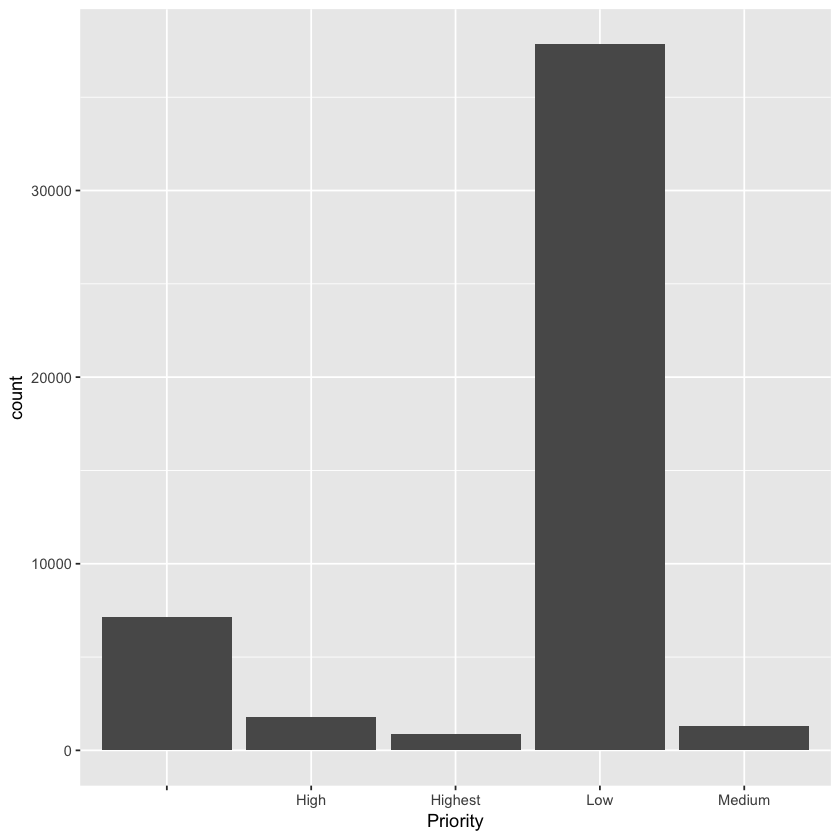

In [8]:
ggplot(new, aes(x = Priority)) + geom_bar()

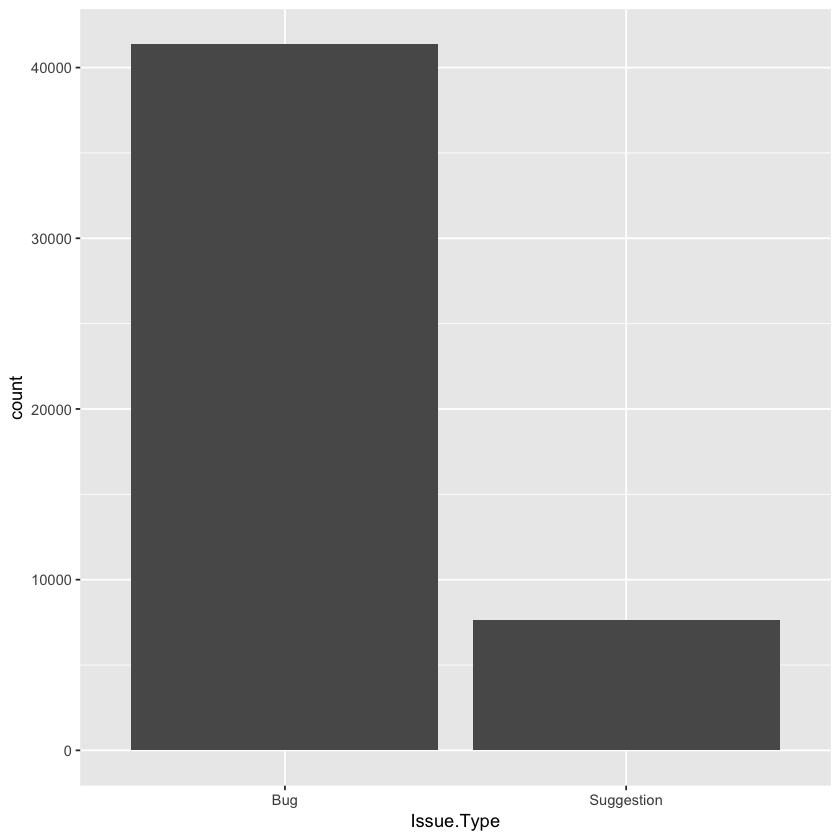

In [9]:
ggplot(new, aes(x = Issue.Type)) + geom_bar()

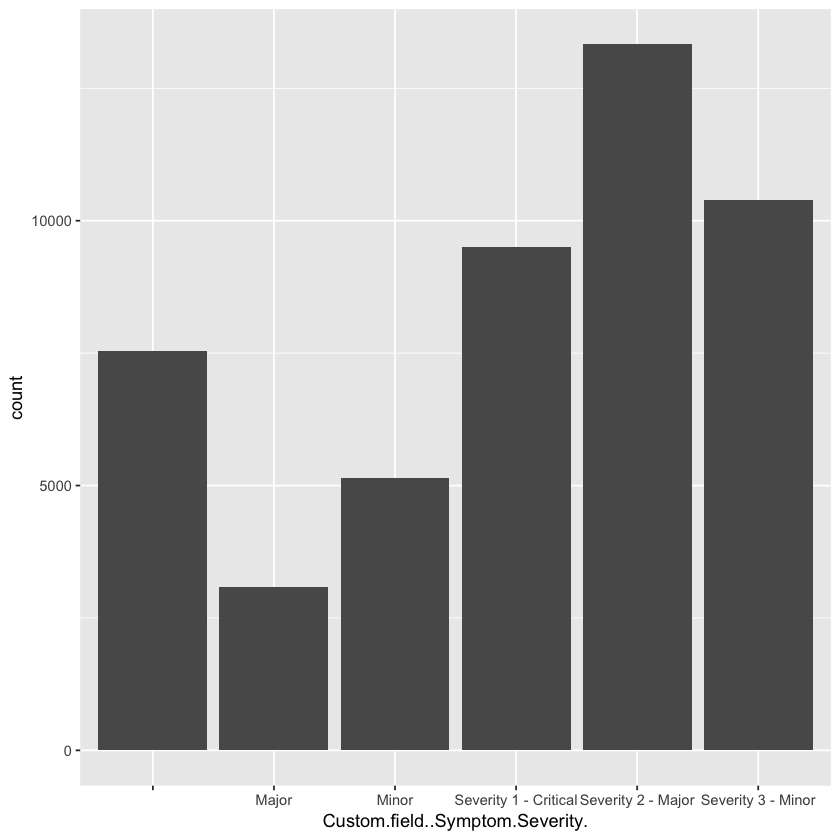

In [10]:
ggplot(new, aes(x = Custom.field..Symptom.Severity.)) + geom_bar()

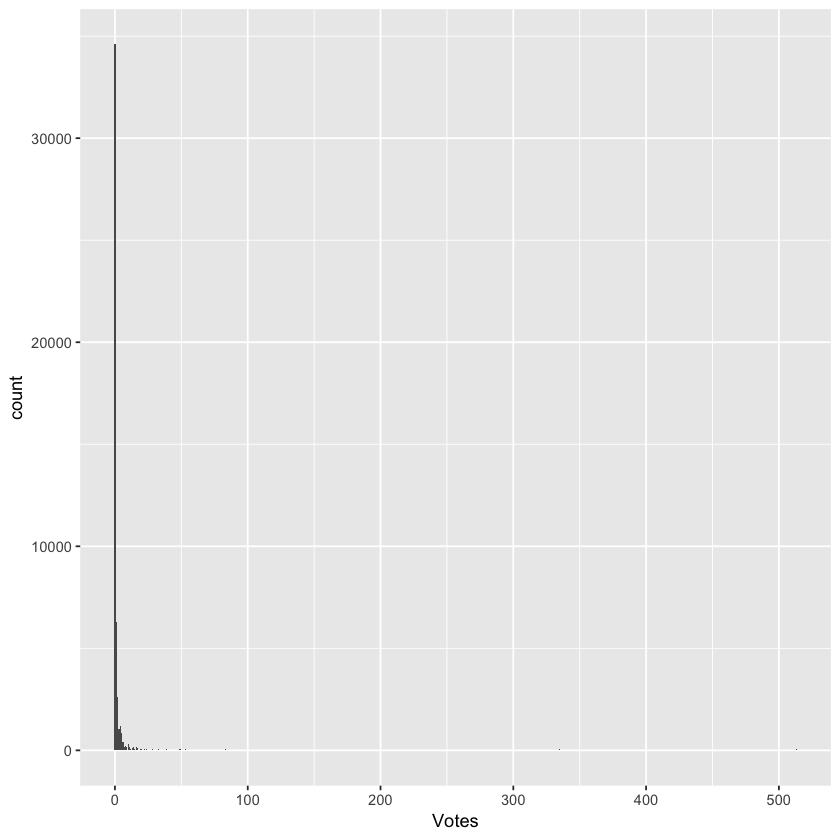

In [11]:
ggplot(new, aes(x = Votes)) + geom_bar()

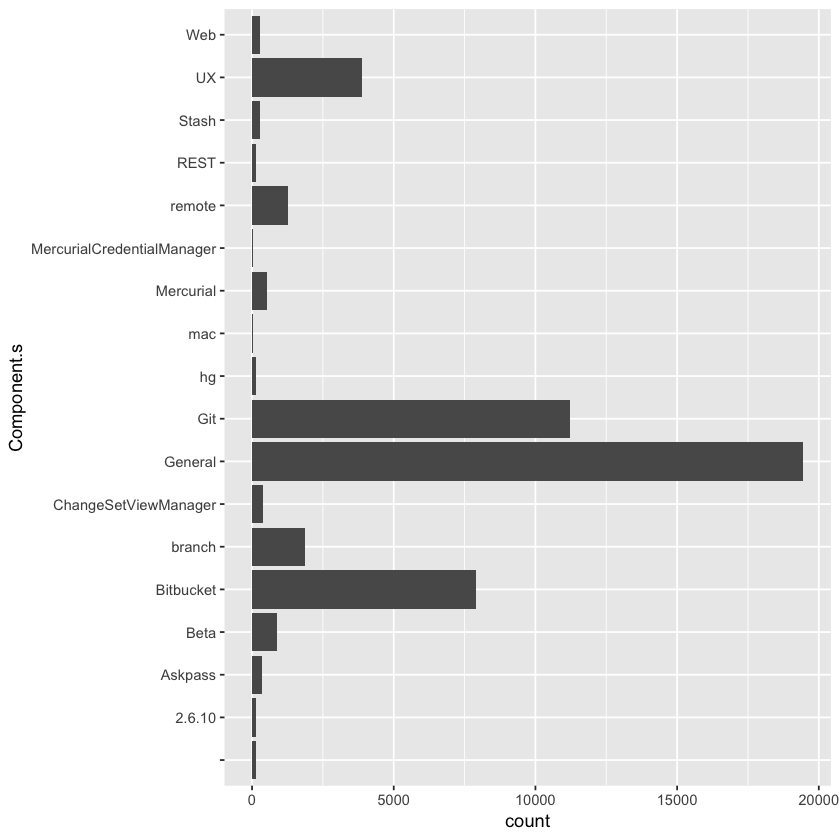

In [12]:
p <- ggplot(new, aes(x = Component.s)) + geom_bar()
p + coord_flip()

### 2. Data Preparation

In [14]:
new[] <- lapply(new, as.numeric)

In [15]:
new <- new[,-15]
new

Issue.id,Issue.Type,Priority,Project.type,Status,Created,Resolution,Resolved,Component.s,Custom.field..Symptom.Severity.,Custom.field..Company.,Custom.field..Date.of.First.Response.,Votes,Environment
1930475,1,2,1,7,559,1,1,6,5,448,1,0,1
1930057,1,4,1,7,493,1,1,8,3,82,1,0,1
1930239,2,1,1,4,459,1,1,12,1,477,1,0,1
1930030,2,1,1,4,458,1,1,9,1,181,1,0,1
1929802,1,5,1,7,419,1,1,8,4,323,1,1,1
1929794,1,5,1,7,418,1,1,9,5,527,1,0,1
1929745,1,4,1,7,313,1,1,17,6,242,1,0,1
1929679,1,4,1,7,284,1,1,8,6,266,1,0,1
1929231,1,2,1,1,191,6,52,8,4,255,428,0,1
1918678,2,1,1,4,729,1,1,8,1,232,1,3,1


In [16]:
summary(new)

    Issue.id         Issue.Type       Priority      Project.type     Status    
 Min.   : 310663   Min.   :1.000   Min.   :1.000   Min.   :1     Min.   :1.00  
 1st Qu.:1473856   1st Qu.:1.000   1st Qu.:4.000   1st Qu.:1     1st Qu.:1.00  
 Median :1680572   Median :1.000   Median :4.000   Median :1     Median :7.00  
 Mean   :1654394   Mean   :1.156   Mean   :3.497   Mean   :1     Mean   :4.64  
 3rd Qu.:1834426   3rd Qu.:1.000   3rd Qu.:4.000   3rd Qu.:1     3rd Qu.:7.00  
 Max.   :1930475   Max.   :2.000   Max.   :5.000   Max.   :1     Max.   :8.00  
    Created        Resolution        Resolved       Component.s   
 Min.   :  1.0   Min.   : 1.000   Min.   :  1.00   Min.   : 1.00  
 1st Qu.:250.8   1st Qu.: 1.000   1st Qu.:  1.00   1st Qu.: 8.00  
 Median :499.5   Median : 1.000   Median :  1.00   Median : 8.00  
 Mean   :499.4   Mean   : 2.612   Mean   : 39.45   Mean   : 8.57  
 3rd Qu.:748.2   3rd Qu.: 5.000   3rd Qu.: 60.25   3rd Qu.: 9.00  
 Max.   :998.0   Max.   :12.000   Max.

### 3. Modeling

In [17]:
fit <- rpart( Issue.id ~ Issue.Type + Priority + Project.type + Status +
             Created + Resolution + Resolved + Custom.field..Symptom.Severity. + 
             Custom.field..Company. + Votes + Environment, data = new)

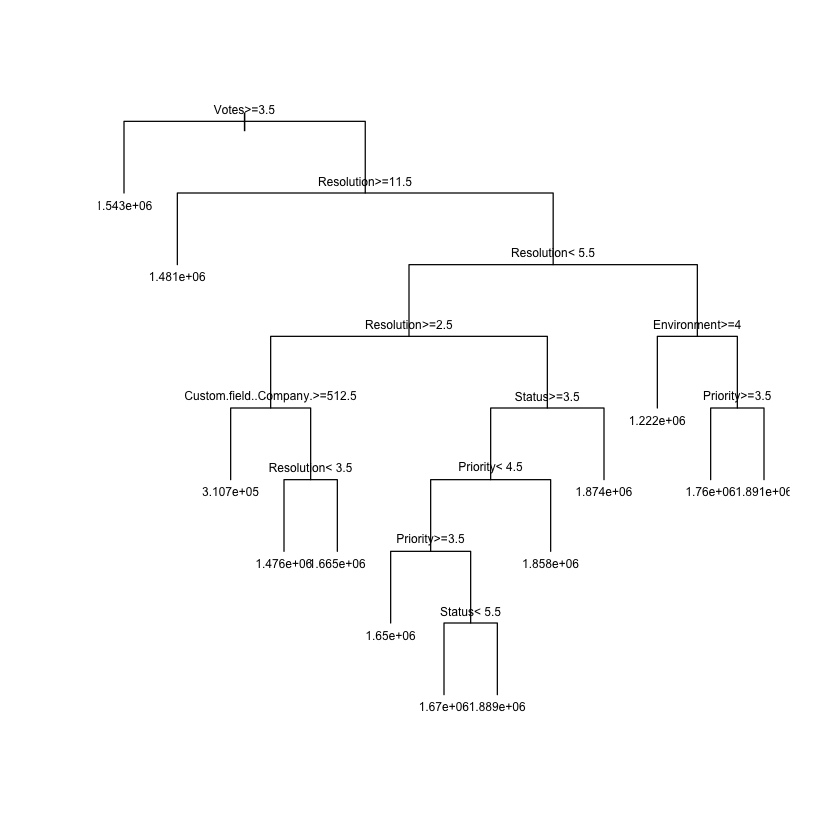

In [18]:
# plot our regression tree 
plot(fit, uniform=TRUE)
# add text labels & make them 60% as big as they are by default
text(fit, cex=.6)

In [19]:
fit <- rpart( Priority ~ Issue.Type + Issue.id  + Project.type + Status +
             Created + Resolution + Resolved + Custom.field..Symptom.Severity. + 
             Custom.field..Company. + Votes + Environment, data = new)

In [20]:
print("Making predictions for the following 6 issues:")
print(head(new))


[1] "Making predictions for the following 6 issues:"
  Issue.id Issue.Type Priority Project.type Status Created Resolution Resolved
1  1930475          1        2            1      7     559          1        1
2  1930057          1        4            1      7     493          1        1
3  1930239          2        1            1      4     459          1        1
4  1930030          2        1            1      4     458          1        1
5  1929802          1        5            1      7     419          1        1
6  1929794          1        5            1      7     418          1        1
  Component.s Custom.field..Symptom.Severity. Custom.field..Company.
1           6                               5                    448
2           8                               3                     82
3          12                               1                    477
4           9                               1                    181
5           8                               4    

In [21]:
print("The predictions are")
print(predict(fit, head(new)))

print("Actual priority")
print(head(new$Priority))

[1] "The predictions are"
       1        2        3        4        5        6 
3.250000 4.035714 1.066667 1.066667 3.250000 3.250000 
[1] "Actual priority"
[1] 2 4 1 1 5 5


In [22]:
mae(model = fit, data = new)

[1] 0.1358817

In [23]:

splitData <- resample_partition(new, c(test = 0.3, train = 0.7))

 
lapply(splitData, dim)

$test
[1] 14699    14

$train
[1] 34301    14

### Error obtained

In [24]:

fit2 <- rpart(Priority ~ Issue.Type + Issue.id + Project.type + Status +
             Created + Resolution + Resolved + Custom.field..Symptom.Severity. + 
             Custom.field..Company. + Votes + Environment, data = splitData$train)

mae(model = fit2, data = splitData$test)

[1] 0.150046